Файл отчета, описания, комментариев

#  Базовый алгоритм: RAG

**RAG** - это технология, объединяющая поиск информации и генерацию текста. Она используется для создания ответов на вопросы, перевода языков и написания контента. 

**Принцип работы:**

1. **Ищет** нужную информацию по запросу.
2. **Извлекает** ключевые моменты из найденного.
3. **Генерирует** текст на основе запроса и извлеченной информации.

**Преимущества:**

* Точнее и информативнее обычных моделей.
* Может создавать длинные и сложные тексты.
* Универсальна: подходит для разных задач.

**Недостатки:**

* Может быть предвзята из-за некачественных данных или поиска среди них
* LLM может галюцинировать, особенно при нехватке найденного контекста

# Шаг вперед: Retrieval Augmented Generation (RAG) + Knowledge Graph (KG)

**Knowledge Graph (KG)**, или "граф знаний", - это база данных, которая представляет собой набор объектов, их атрибутов и взаимосвязей между ними. 

**RAG + KG** - это комбинация RAG и KG, которая позволяет использовать знания из графа знаний для улучшения работы RAG. 

**Как это работает:**

1. **Поиск:** Ищет релевантную информацию в KG, используя запрос пользователя.
2. **Извлечение информации:** Из найденных объектов KG модель извлекает атрибуты, отношения и другие релевантные сведения.
3. **Генерация текста:** Модель использует извлеченную информацию из KG и собственные знания для генерации более точного и информативного текста.

**Преимущества RAG + KG:**

* **Более точная и информативная** по сравнению с традиционными RAG-моделями.
* **Способна генерировать более длинные и сложные тексты.** по причине расширенного доступа к информации, лучшему пониманию контекста, повышенная способность к рассуждению за счет информацию об отношениях из графа.
* **Может быть использована для задач, требующих глубоких знаний, таких как ответ на сложные вопросы, написание обзоров и т.д.**

**Недостатки RAG + KG:**

* **Требует большой базы данных KG.**
* **Может быть предвзята, если данные некачественные.**
* **Сложность модели (как LLM, так и всей схемы)**
* **Как обычный RAG может галюционировать**

# Оцениваемый (второй) алгоритм: RAG + KG Rerank

Примечание: я бы назвал его именно так, это соотвествует названию и описанию в файле "Copy of KG-RAG-LLM.pdf".

Алгоритм RAG+KG требует большой базы данных KG и достаточно сложный. При этом он не лишон недостатка RAG - галюционировании при недостатке данных. Мы хотим избавиться от этого недостатка, созданием алгоритма с реранжированием

Рассмотрим вначале алгоритм **Beam Search**, который будет использвоатся как часть пайплайна

## Beam Search

**Beam Search** - алгоритм поиска, используемый в LLM для выбора наиболее вероятного продолжения текста, учитывая предыдущие слова. Просматривает множество вариантов продолжения текста, "расширяя" наиболее перспективные. Выбирает финальный вариант с наивысшей вероятностью, либо выдает на выходе несколько вариантов с их вариантами. Такой список будет иметь ранжирование в соотвествии с LLM Beam Search

**Достоинства:**

* **Эффективность:** Находит хорошие решения быстрее полного перебора.
* **Качество:** Выбирает более вероятные продолжения, чем greedy search.
* **Вариативность:** Предлагает несколько вариантов, которые могут значимо различаться, в отличии от повторной генерации и некоторой температуры

**Недостатки:**

* **Настройка:** Требует настройки ширины луча (максимального числа вариантов).
* **Ограничения:** Может пропустить "лучший" вариант, если он не попал в число лучших на ранних стадиях, что требует более глубокого поиска и, как следствие, больше вычислительных ресурсов и памяти

**Принцип работы:**

[Хорошая статья](https://skillbox.ru/media/) о принципе работы. Если кратно, то на картинке ниже вароятность выбирается не следующего шага, а забегая вперед на два шага. Вероятность has (0.9) выше, чем если бы генерация шла по жадного пути, отмеченному красным

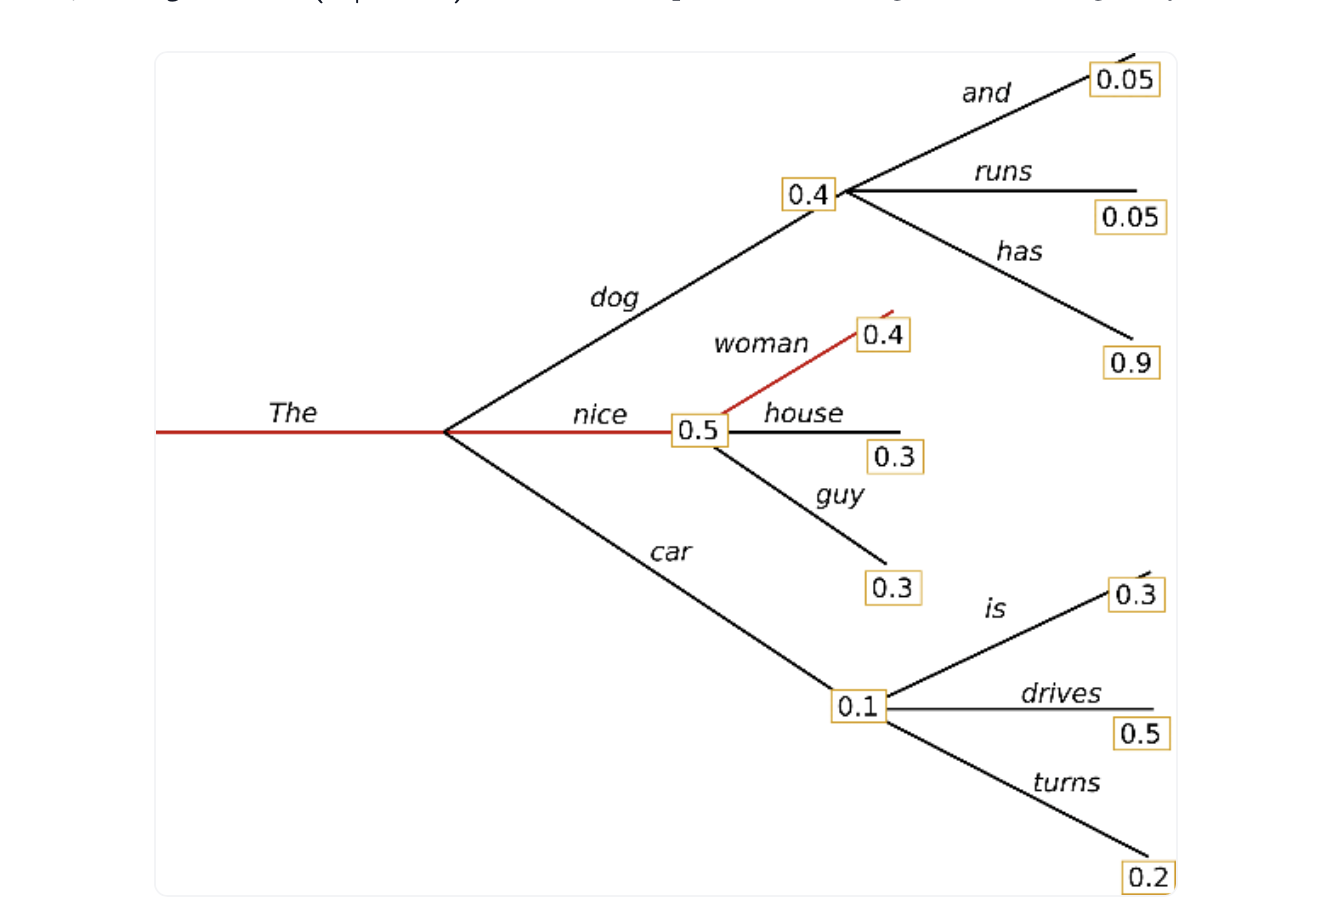


## Суть алгоримтма RAG + KG Rerank: проверка сгенерированного текста на соответствие фактам

**RAG + KG Rerank** - это алгоритм, который использует **Knowledge Graph (KG)** для проверки и улучшения качества текста, сгенерированного **Retrieval Augmented Generation (RAG)**. 

**Как работает RAG + KG Rerank:**

1. **RAG генерирует текст:** RAG использует **Beam Search** для создания нескольких вариантов текста, соответствующих запросу пользователя.
2. **KG-реранжировка:** Каждый вариант текста оценивается на основе его соответствия информации из **KG**. 
    * **Извлечение сущностей:** Алгоритм извлекает из текста ключевые сущности (имена людей, места, события).
    * **Сопоставление с KG:** Извлеченные сущности сопоставляются с соответствующими объектами в KG.
    * **Оценка релевантности:** Оценивается релевантность текста информации из KG.
3. **Выбор лучшего варианта:** Текст с наивысшей оценкой релевантности KG выбирается в качестве финального результата.

**Преимущества RAG + KG Rerank:**

* **Повышенная точность:** KG помогает RAG генерировать более точные и достоверные тексты, основанные на фактах.
* **Соответствие знаниям:** KG обеспечивает соответствие текста общепринятым знаниям и информации.
* **Меньше ошибок:** KG помогает снизить количество ошибок и неточностей в сгенерированном тексте, **уменьшая галюционирование** в конечном тексте

**Недостатки RAG + KG Rerank:**

* **Сложность:** Алгоритм требует наличия KG и интеграции с ним.
* **Зависимость от качества KG:** Точность RAG + KG Rerank зависит от качества и полноты KG.
* **Вычислительные затраты:** Оценка релевантности KG может быть ресурсоемкой.

**Примеры использования RAG + KG Rerank:**

**Ссылки:**

* [https://arxiv.org/html/2312.10997v3](https://arxiv.org/html/2312.10997v3)
* [https://www.cs.washington.edu/research/nlp/publications-by-year](https://www.cs.washington.edu/research/nlp/publications-by-year)
* [http://blog.research.google/2023/01/google-research-2022-beyond-language.html](http://blog.research.google/2023/01/google-research-2022-beyond-language.html)


# Подготовка

Для извлечения фактов и создания KG потребуется обучать модели, поэтому мы не можем использовать одни и те же самые данные для обучени, валидации и проверки. 

Разделяем данные в соотношении 0.66 и 0.33 на обучающую выборку и тестовую. Обучать будем только на обучающей, без подклядывания в тест. А тестировать только на тестовой, которая гарантирует, что этих данных модель не видела ранее.

За это отвечат файл train_prepare.ipynb. Он создает датасеты Xy_test.csv и Xy_train.csv для каждого из доменов. Фактически создается по два набора датасетов для каждого домена, для первой и второй модели, но об этом позже

# Модели извлечения фактов для KG

KG представляет собой набор фактов в виде триплетов. Каждый триплет содержит обеъет, субъет и их взаимосвязь. Например, Билл Гейс создатель Microsoft. 

Как было описано в ноутбуках, используется две модели. Первая для извлечения сущностей, вторая для определения их взаимоствязей.

## Обучение моделей извлечения фактов

Обучение проводилось для моделей LLAMA-2. Обучение с помощью QLORА, что позволило обучить LLM без крайне больших затрат. За обучение отвечает файл train_cloud.ipynb. Так как использовалась QLORA поверх уже предобученной LLM LLAMA-2, то правильнее будет говорить о дообучении.

**LORA (Low-Rank Optimization for Adapting Language Models)** и **QLORA (Quantized Low-Rank Optimization for Adapting Language Models)** - это методы оптимизации, разработанные для обучения и адаптации больших языковых моделей (LLM) на ограниченных вычислительных ресурсах.

**LORA:**

* Разделяет параметры LLM на два компонента: вектор низкого ранга (VLR) и глобальный вектор (GV).
* Оптимизирует только VLR, что значительно снижает объем вычислений.
* GV остается неизменным, сохраняя базовые знания LLM.

**QLORA:**

* Использует квантование для дальнейшего уменьшения объема вычислений при оптимизации VLR.
* Применяет пороговое квантование, сохраняя наиболее важные компоненты VLR.
* Позволяет обучать LLM на устройствах с ограниченной памятью и вычислительной мощностью.

**Преимущества LORA и QLORA:**

* **Эффективность:** Значительно снижают объем вычислений, необходимых для обучения LLM.
* **Масштабируемость:** Позволяют обучать LLM на устройствах с ограниченными ресурсами.
* **Гибкость:** LLM, обученные с помощью LORA/QLORA, могут быть адаптированы к новым задачам с помощью дообучения.

**Недостатки LORA и QLORA:**

* **Потенциальное снижение качества:** Квантование может привести к незначительному снижению качества LLM.

## Конвертация в GGUF

**GGUF** - перспективный формат для LLM, делающий их более доступными, эффективными и универсальными.

**Преимущества:**

* **Эффективность:** Меньший размер файла, быстрая загрузка, подходит для устройств с ограниченными ресурсами.
* **Производительность:** Оптимизирован для LLM, обеспечивает низкую задержку.
* **Универсальность:** Поддерживает различные LLM от разных разработчиков.
* **Модульность:** Легко добавлять новые функции.
* **Открытость:** Спецификация доступна всем.

Конвертация необходима, потому что обучение происходит в pytorch, а инференс в gguf, Процесс конфертации производился с помощью официальной библиотеки **llama.cpp** и описан в файле train_cloud.ipynb 

## Квантеризация в Q4

**Квантизация** - это метод оптимизации LLM, который позволяет уменьшить их размер и повысить производительность. Она достигается путем преобразования параметров моделей из более точных форматов, таких как FP32, в менее точные, например, INT8.

**Преимущества квантизации LLM:**

* **Снижение размера модели:** Квантованные модели занимают в 4-8 раз меньше места, чем их полноразмерные аналоги. Это в первую очередь уменьшает требования к видеопамяти и зачастую позволяет запускать инференс модели на обычном компьютере. Так же это позволяет хранить и передавать их более эффективно.
* **Повышение производительности:** Квантованные модели могут работать в 2-4 раза быстрее, чем полноразмерные, на устройствах с соответствующим аппаратным ускорением.

Стоит отметить, что квантизация может привести к незначительному снижению качества модели. Однако в большинстве случаев это снижение качества незаметно для пользователей. В целом, квантизация является ценным инструментом для оптимизации LLM, делающим их более доступными, эффективными и удобными для использования на различных устройствах.

Для нас квантеризация необходима, чтобы инференс всего пайплайна проходил на рабочем компьюете и не требовал больше 16Гб оперативной памяти. Процес конвертации проводился с помодью официальной библиотеке llama.cppp и описан в train_eval.ipynb


## Постпроцессинг триплетов

Поскольку локальные модели порой склонны к галлюцинациям, мы дополнительно проведем постобработку сгенерированных триплетов. Сначала мы используем эвристики и удаляем триплеты, если они не полные по структуре, например, отсутствует один из элементов sub, rel или obj, если один из элементов пустой или содержит значение unknow. Следующим шагом мы при помощи LLM делаем дополнительную проверку на факты в триплете и в тексте.

За это отвечает файл triplets_postprocessing.ipynb

## Оценка качества извлечения фактов

Оценка качества проводится на отложенной тестовой выборке. Процесс генерации триплетов занимает много времени, поэтому вынесен в отедльнный скрипт train_eval.ipynb, он формирует файлы:
- `triples_gt.jsonl` - тестовая выборка, референсные значения
- `triples_base.jsonl` - модель без обучения
- `triples_ft.jsonl` - после дообучения
- `triples_ft_pp.jsonl` - после дообучения и постпроцесинга

Для полноценного тестирования были выбраны несколько метрик. За это отвечает файл evaluate_triplets.ipynb

Как простую метрику для оценки, но в то же время оцень информативную возьмет среднее значение **меры Жаккара**. А так же адаптированные классические метрики **recall**, **precision** и **f1**

**Мера Жаккара** - показатель схожести между множествами. Чем больше общих элементов, тем выше мера (от 0 до 1).

Мера Жаккара вычисляется как отношение количества общих элементов в двух наборах к общему количеству элементов в обоих наборах. Формула:

```
J(A, B) = |A ∩ B| / |A ∪ B|
```

где:

* **J(A, B)** - мера Жаккара между наборами A и B
* **|A ∩ B|** - количество общих элементов в A и B
* **|A ∪ B|** - общее количество элементов в A и B

При вычислении меры Жаккара считаем одинаковыми триплетами только при полном совпадении объекта, судьекта и взаимосвязи двух триплетов. То есть метрика достаточна требовательная.



/var/folders/0t/8sd3p8197w77vtz4_ts53h4m0000gn/T/ipykernel_39606/1337995728.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df.knowknowledge_graph != 'ground truth'].groupby('knowknowledge_graph').mean().plot(kind='barh', grid=True)


<Figure size 640x480 with 0 Axes>

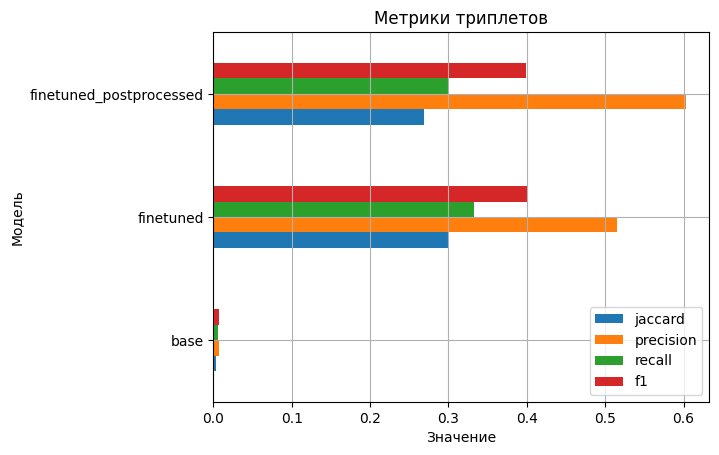

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.concat([
    pd.read_csv('artifacts/movie/kg_metrics.csv'),
    pd.read_csv('artifacts/computer/kg_metrics.csv'),
    pd.read_csv('artifacts/nature/kg_metrics.csv')
])

plt.figure()
df[df.knowknowledge_graph != 'ground truth'].groupby('knowknowledge_graph').mean().plot(kind='barh', grid=True)
plt.title(f'Метрики триплетов')
plt.xlabel('Значение')
plt.ylabel('Модель')
plt.legend(title='Метрика')
plt.legend(loc='lower right')
plt.show();


## Вывод
- Модели извлечения триплетов работают
- Обучение работает, метрики значтилеьно вырости на всех доменах
- Построцессинг улучшил отдельные метрики
- Модель извлекает триплеты достаточно качественно

# Пайплайн инференса

Общими словами был описан выше в описании алгоритма

Пайплайн, подготовка
- Для RAG
  - Создаем ретривер на chroma и  bge-small-en-v1.5 (строим базу данных текстов для RAG)
- Для KG Rerank
  - строим KG триплетов с использованием обученных моделей
  - Создаем графовый ретривер, добавляя в него заранее сгенерированные триплеты. 
  - Создаем KG-ретривер, котрорый будет возвращать релевантные к запросу триплеты.
- Делаем RAG с моделью LLM через библиотку Hugging Face (rag_clod), Возможность получить от модели вариативный вывод (beam search) есть только transformers. Скрипт rag_clod.ipynb
  
Пайплайн, инференс (скрипт rag_rerank.ipynb)
1. Мы отправляем запрос в RAG-сеттинг и получаем от модели несколько ответов. 
2. Отправляем этот же запрос в KG-ретривер, чтобы получить релеватные триплеты.
3. Реранк Ответов модели:
 * Первый вариант: Получаем векторное представление найденных триплетов и сравниваем его с эмббедингами ответов. Предполагаем, что эмббединг наилучшего ответа модели будет наиболее близок к эмббедингу триплетов. 
 * Второй вариант: Просим большую модель с учетом триплетов реранжировать ответы изначальной модели. 

# Сравнение моделей

Как проводилось (eval_models_answer.ipynb)
- с помощью generate_q_from_text.ipynb создали вопросы на вход моделей (как и раньше, только тестовая выборка)
- проходим только RAG, сохраняем результат
- проходим KG Rerank по ответам RAG. И так для трех вариантов KG (gold truth = ground truth, fine tuned, fine tuned postprocessed). И разными поисками cosine и llm. Однако llm не изменяла порядок ни в одном случае и в метриках не рассматривалась. Её ответ равен rag.
- проходим LLM по тройкам (вопрос, ответ 1, ответ 2) и определяем какой из ответов лучше отвечает на вопрос
- измеряем метрики

In [47]:
import os
pd.read_csv(os.path.join('artifacts', 'rag_metrics.csv'))

,domain,algorithm,total_rows,diff_rows,rag_better_count,reranked_better_count,unknown_count
0,movie,cosine_reranked_ft,214,41,27,14,0
1,movie,cosine_reranked_ftpp,214,41,24,17,0
2,movie,cosine_reranked_gt,214,41,26,15,0
3,computer,cosine_reranked_ft,62,22,15,6,1
4,computer,cosine_reranked_ftpp,62,22,13,9,0
5,computer,cosine_reranked_gt,62,22,17,5,0
6,nature,cosine_reranked_ft,114,38,21,17,0
7,nature,cosine_reranked_ftpp,114,38,17,21,0
8,nature,cosine_reranked_gt,114,38,25,12,1


Обозначания столбцов
- `total_rows` - количество строк в тесте
- `diff_rows` - количество различных ответов RAG Beam Search (да, их не так много, и то подбирались гиперпараметрами). Обоснование что немного - у нас мало информации и модели негде ошибаться/сомневаться, в контекст попадают верные значения.
- далее мы имеем ответ rag и rag+
  - `rag_better_count` - ответ обычного RAG
  - `reranked_better_count` - ответ RAG+ лучше
  - `unknown_count` - не понятно, кто лучше, ошибка парсинга (их мало, можно не учитывать и не менять ничего - там llm ответила в неожиданном формате)

**Вывод**:
- Количество ответов, где RAG был лучше, больше чем RAG+
- Есть только один случай nature+cosine_reranked_ftpp, где RAG+RR немного лушче RAG
- можно отметить, что ftpp (построцессинговые файнтюненые) триплеты на всех доменах показали лучший результат, и даже лушче gt
- возможно llm (второй подход к ранжирвованию) была права, оставляя ранжирование исходного RAG	
-  
- дополнительно сравнивать с KG на моделе без обучения нет смысла, так как её метрики по построению триплетов очень низкие
- допонительно проведена проверка еимеет ли влияние построцессинг триплетов
- дополнительно проведена проверка двух вариантов реранка cosin и llm

# Примеры генерации

In [56]:
import numpy as np
np.random.seed(77)

sample_count = 2

def get_df_by_domain(domain):
    df1 =  pd.read_csv(f'artifacts/{domain}/eval_dataset.csv')
    df1 = df1[df1.uniq_count == 3]
    df1 = df1[df1.rag_0 != df1.cosine_reranked_ftpp]
    df1 = df1[['question', 'rag_0', 'cosine_reranked_ftpp']]
    df1 = df1.sample(sample_count).reset_index(drop=True)

    print('==================================')
    print(domain)
    for i in range(sample_count):
        if i != 0:
            print('----------------------------------')
        print('QUESTION = ' + df1.loc[i, 'question'])
        print('RAG   = ' + df1.loc[i, 'rag_0']) 
        print('RAG++ = ' + df1.loc[i, 'cosine_reranked_ftpp']) 
        
    print('')

    df1['domain'] = domain
    return df1

pd.concat([get_df_by_domain(x) for x in ['movie', 'computer', 'nature']])


movie
QUESTION = What is the focus of the 1998 British documentary film Kurt & Courtney?
RAG   = Investigating the circumstances surrounding the death of Kurt Cobain, and allegations of Courtney Love's involvement in it.
RAG++ = The circumstances surrounding the death of Kurt Cobain, and allegations of Courtney Love's involvement in it.
----------------------------------
QUESTION = Who wrote and directed the Pixar CGI animated short film Partly Cloudy?
RAG   = Partly Cloudy is a Pixar CGI animated short film written and directed by Peter Sohn and produced by Kevin Reher.
RAG++ = The Pixar CGI animated short film Partly Cloudy was written and directed by Peter Sohn.

computer
QUESTION = What is VRX and what operating system does it refer to?
RAG   = VRX is an acronym for Virtual Resource eXecutive, a proprietary operating system on the NCR Criterion series, and later the V-8000 series of mainframe computers manufactured by NCR Corporation during the
RAG++ = VRX is an acronym for Virtual

,question,rag_0,cosine_reranked_ftpp,domain
0,What is the focus of the 1998 British document...,Investigating the circumstances surrounding th...,The circumstances surrounding the death of Kur...,movie
1,Who wrote and directed the Pixar CGI animated ...,Partly Cloudy is a Pixar CGI animated short fi...,The Pixar CGI animated short film Partly Cloud...,movie
0,What is VRX and what operating system does it ...,VRX is an acronym for Virtual Resource eXecuti...,VRX is an acronym for Virtual Resource eXecuti...,computer
1,Which platforms was 10th Frame released for?,"10th Frame was released for the Amstrad CPC, A...","10th Frame was released for the Amstrad CPC, A...",computer
0,What is the height of Jekselen Peak and where ...,"The height of Jekselen Peak is 1,405 metres (4...","The height of Jekselen Peak is 1,405 metres (4...",nature
1,What changes were made to the family Penaeacea...,The family Penaeaceae was expanded under the A...,The inclusion of the genera Olinia (formerly i...,nature


# Примечание

Пайплайн RAG + KG Rerank как описано выше. Именно так есть в скриптах и обсуждалось с Анатолием (мы 40 минут проговаривали пайплайн и сравнение моделей в онайн, когда возник этот вопрос)

Пайплайн может быть модицификрован на RAG KG + KG Rerank. В этом случае ретривер для RAG будут использвоаться тоже графовый ретривер. А по алгоримту получается "масло маслянное" - строим по графу и проверяем им же. Результат на этих данных примерно одинаковый, так как данных мало и на них они работают одинаково. При необходимости можно упоминуть, что это тоже проверялось, или просто иметь в виду.